<a href="https://colab.research.google.com/github/g6104018-lang/repository2/blob/main/Predicci%C3%B3n_de_la_eficiencia_del_combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#segun el documento
pip install ucimlrepo


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


In [4]:
#conuunto x
#y
X.head()
y.head()


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [5]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [6]:
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [7]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()
#eliminar las variable no nulas y eliminarlas simultaneamente.

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [9]:
# definir los conjuntos X e y
X = df.drop('mpg', axis=1)
y = df['mpg']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


In [11]:
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Escalar los datos para que los datos tengan una media de 0 y una desviación estándar de 1

In [12]:
#modelo de red neuronal
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
#Sequential para definir el modelo de red neuronal

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#Compilar el modelo

from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [14]:
#Crear un optimizador Adam con una tasa de aprendizaje del 0.001

model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)



In [16]:
#entrenar el modelo en los datos de entrenamiento utilizando fit
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 100187.1719 - root_mean_squared_error: 259.6500 - val_loss: 116.2211 - val_root_mean_squared_error: 10.7806
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 111.3518 - root_mean_squared_error: 10.5268 - val_loss: 112.4109 - val_root_mean_squared_error: 10.6024
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 102.9613 - root_mean_squared_error: 10.1085 - val_loss: 78.3518 - val_root_mean_squared_error: 8.8517
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 74.4290 - root_mean_squared_error: 8.6196 - val_loss: 85.6001 - val_root_mean_squared_error: 9.2520
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78.7417 - root_mean_squared_error: 8.8581 - val_loss: 88.1627 - val_root_mean_squared_error: 9.3895


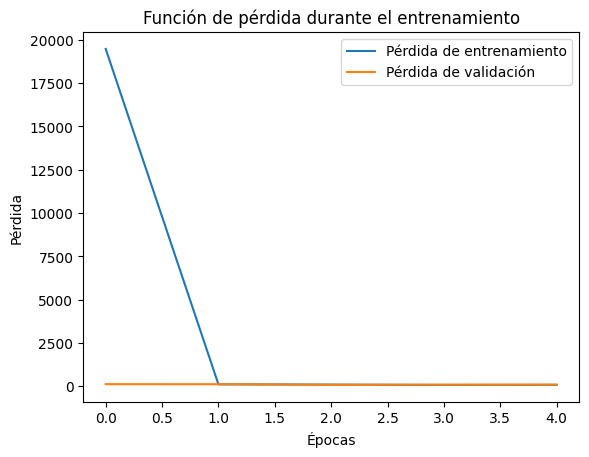

In [17]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [18]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 84.9241 - root_mean_squared_error: 9.2132 
Test Mean Absolute Error: 9.39


In [19]:
#Predicciones
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
     Actual  Predicted
82     23.0  22.091557
167    29.0  23.830261
356    32.4  25.598946
120    19.0  24.152905
385    38.0  24.755482


In [20]:
#metricas
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: -0.2717782833143034
MSE: 88.16256424645901
